# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

val_set = val_datagen.flow_from_directory('dataset/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
model2 = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
model2.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
model2.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [10]:
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
history = model2.fit(x = training_set, validation_data = val_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 101s 615ms/step - loss: 0.4994 - accuracy: 0.7706 - val_loss: 0.5444 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 98s 598ms/step - loss: 0.2292 - accuracy: 0.9070 - val_loss: 0.5554 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 102s 627ms/step - loss: 0.2086 - accuracy: 0.9145 - val_loss: 0.8326 - val_accuracy: 0.6250
Epoch 4/25
163/163 [==============================] - 98s 601ms/step - loss: 0.1767 - accuracy: 0.9295 - val_loss: 0.4409 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 100s 613ms/step - loss: 0.1802 - accuracy: 0.9303 - val_loss: 0.3453 - val_accuracy: 0.8125
Epoch 6/25
163/163 [==============================] - 97s 597ms/step - loss: 0.1846 - accuracy: 0.9231 - val_loss: 0.9544 - val_accuracy: 0.6250
Epoch 7/25
163/163 [==============================] - 98s 598ms/step - loss: 0.1588 - accuracy: 0.9340 - val_loss: 0.3161 - val

In [13]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3211520   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

## Accuracy

In [14]:
train_loss, train_acc  = model2.evaluate(training_set)
test_loss , test_acc = model2.evaluate(test_set)
train_acc = train_acc*100
test_acc = test_acc*100
print('train: %.2f, test: %.2f' % (train_acc, test_acc))

20/20 [==============================] - 9s 450ms/step - loss: 0.3743 - accuracy: 0.8990
train: 97.05, test: 89.90


## Model Accuracy Graph

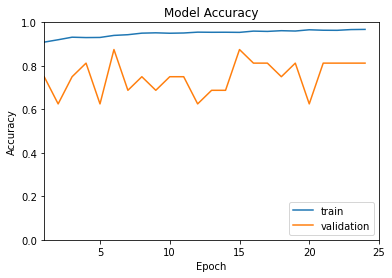

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([1,25])
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.savefig('model2_AccuracyVsValidationAccuracy.jpg')

## Model Loss Graph

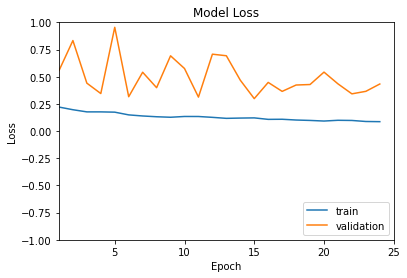

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-1, 1])
plt.xlim([1,25])
plt.title('Model Loss')
plt.legend(loc='lower right')
plt.savefig('model2_LossVsValidationLoss.jpg')

In [17]:
model2.save('cnnModel2.h5')